# **1. IMPORT LIBRARY**

Pertama kita melakukan import yang diperlukan dalam melakukan membaca data, mendeskripsikan data, membuat model, dan melakukan test model

In [ ]:
# library umum
import numpy as np
import pandas as pd
from typing import Literal
# library sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from scipy.stats.mstats import winsorize

# library menampilkan data
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# **2. DATA UNDERSTANDING**

## **2.1. IMPORT DATA**

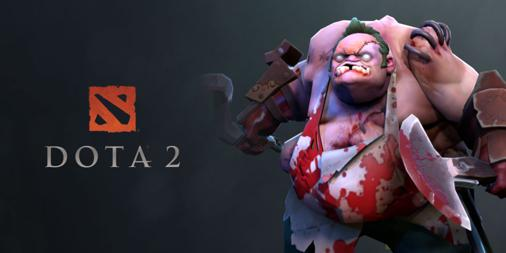

Dota 2 is a popular computer game with two teams of 5 players. At the start of the game each player chooses a unique hero with different strengths and weaknesses. The dataset is reasonably sparse as only 10 of 113 possible heroes are chosen in a given game. All games were played in a space of 2 hours on the 13th of August, 2016

### Attribute Information:
Each row of the dataset is a single game with the following features (in the order in the vector):
1. Team won the game (1 or -1)
2. Cluster ID (related to location)
3. Game mode (eg All Pick)
4. Game type (eg. Ranked)
5. *till end*: Each element is an indicator for a hero.   
    Value of 1 indicates that a player from team '1' played as that hero and '-1' for the other team.    
    Hero can be selected by only one player each game. This means that each row has five '1' and five '-1' values.

Melakukan import yang diperlukan untuk membuat model, data ini di dapat dari website https://archive.ics.uci.edu/ml/datasets/Dota2+Games+Results

melakukan koneksi antara google drive dengan file collab

In [ ]:
# mounting google drive to Colab Runtime environment. Koneksi Ke G.Drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


membuka dataset yang telah dihubungkan dengan googgle drive atau path penyimpanan dataset tersebut

In [ ]:
# loading dataset
# in this dataset, the dataset_dota2 are separated using ';' symbol. Therefore, when reading the CSV,
# we should instruct the Pandas DataFrame about the separater. This is because the default separater is the ','
# and that if we do not specify, the DataFrame will have all the row dataset_dota2 into one cell.

# COLLAB
dataset_dota2_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/NNDL/dota/dota2Train.csv',encoding= 'unicode_escape',header=None)
dataset_dota2_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/NNDL/dota/dota2Test.csv',encoding= 'unicode_escape',header=None)

# # VSC
# dataset_dota2_train = pd.read_csv('D:\\CODING\\SMT5\\NNDL\\DATASET\\dota2Dataset\\dota2Train.csv',encoding= 'unicode_escape',header=None)
# dataset_dota2_test = pd.read_csv('D:\\CODING\\SMT5\\NNDL\\DATASET\\dota2Dataset\\dota2Test.csv',encoding= 'unicode_escape',header=None)
# getting a glimpse of the dataset_dota2

In [ ]:
# Load the heroes_names into a DataFrame
heroes_names = pd.read_json('https://raw.githubusercontent.com/kronusme/dota2-api/bbc512369ccb1490804d0e4ed13f5b58f20ca004/data/heroes.json')

# Rename the column
heroes_name = [heroes_names['heroes'][i]['localized_name'] for i in range(0,len(heroes_names['heroes']))]
heroes_id = [heroes_names['heroes'][i]['id'] for i in range(0,len(heroes_names['heroes']))]
heroes_names = pd.DataFrame(heroes_name, columns=['heroes_name'], index=heroes_id)
# heroes_names.sort_values('id', inplace=True)
display(heroes_names)


,heroes_name
1,Anti-Mage
2,Axe
3,Bane
4,Bloodseeker
5,Crystal Maiden
...,...
110,Phoenix
105,Techies
111,Oracle
112,Winter Wyvern


In [ ]:
lobbies_names = pd.read_json('https://raw.githubusercontent.com/kronusme/dota2-api/master/data/lobbies.json')

lobbies_name = [lobbies_names['lobbies'][i]['name'] for i in range(0,len(lobbies_names['lobbies']))]
lobbies_id = [lobbies_names['lobbies'][i]['id'] for i in range(0,len(lobbies_names['lobbies']))]
lobbies_names = pd.DataFrame(lobbies_name, columns=['lobbies_name'], index=lobbies_id)
# lobbies_names.sort_values('id', inplace=True)
display(lobbies_names)


,lobbies_name
-1,Invalid
0,Public matchmaking
1,Practice
2,Tournament
3,Tutorial
4,Co-op with bots
5,Team match
6,Solo Queue
7,Ranked
8,Solo Mid 1vs1


In [ ]:
mods_names = pd.read_json('https://raw.githubusercontent.com/kronusme/dota2-api/master/data/mods.json')

mods_name = [mods_names['mods'][i]['name'] for i in range(0,len(mods_names['mods']))]
mods_id = [mods_names['mods'][i]['id'] for i in range(0,len(mods_names['mods']))]
mods_names = pd.DataFrame(mods_name, columns=['mods_name'], index=mods_id)
# mods_names.sort_values('id', inplace=True)
display(mods_names)


,mods_name
0,Unknown
1,All Pick
2,Captains Mode
3,Random Draft
4,Single Draft
5,All Random
6,?? INTRO/DEATH ??
7,The Diretide
8,Reverse Captains Mode
9,Greeviling


In [ ]:
regions_names = pd.read_json('https://raw.githubusercontent.com/kronusme/dota2-api/master/data/regions.json')

regions_name = [regions_names['regions'][i]['name'] for i in range(0,len(regions_names['regions']))]
regions_id = [regions_names['regions'][i]['id'] for i in range(0,len(regions_names['regions']))]
regions_names = pd.DataFrame(regions_name, columns=['regions_name'], index=regions_id)
display(regions_names)

,regions_name
111,US West
112,US West
113,US West
114,US West
121,US East
122,US East
123,US East
124,US East
131,Europe West
132,Europe West


In [ ]:
# list heroes https://github.com/Ayub-Khan/Dota-2-Hero-Suggester/blob/master/heroes.txt
data_hero = open('/content/gdrive/My Drive/Colab Notebooks/NNDL/dota/ListHero.txt', 'r')
# data_hero = open('D:/CODING/SMT5/NNDL/DATASET/68cc46b435a44898b35bee383bd69f9b-b157c3a655aeb8f3fbf8a33358c69290cff274b8/ListHero.txt', 'r')
data_hero = [line.strip() for line in data_hero] #WASP = IO, LYCAN = LYCANTROPY, UNDERLORD = ABBYSAL UNDERLORD, SKELETON KING = WRAITH KING,

# MENGECEK HERO YANG TIDAK ADA DI DATASET
for i in data_hero:
    if i not in heroes_names['heroes_name'].values:
        print(i)
print('JUMLAH DATA HERO YANG ADA',len(data_hero))
# MONKEY KING TIDAK ADA KARNA BELUM DI RELEASE ID MONKEY KING 114
#DOTA 2 API TERBARU https://github.com/leamare/D2-LRG-Metadata/blob/master/heroes.json


Monkey King
JUMLAH DATA HERO YANG ADA 113


In [ ]:
for i in range(1,113):
    if i not in heroes_names.index:
        print(i)

#DOTA 2 API TERBARU https://github.com/leamare/D2-LRG-Metadata/blob/master/heroes.json
#ID HERO 24 MEMANG TIDAK ADA

24


In [ ]:
# for i in range(1,113):
#     dataset_dota2_train.rename(columns={i:heroes_names['name'][i-1]}, inplace=True)
#     dataset_dota2_test.rename(columns={i:heroes_names['name'][i-1]}, inplace=True)


In [ ]:
dataset_dota2_train.rename(columns = {0:'TeamWIN',1:'ClusterID',2:'GameMode',3:'GameType'}, inplace = True)

In [ ]:
Stat_game = dataset_dota2_train[["TeamWIN","ClusterID","GameMode","GameType"]]
Heroes_pick = dataset_dota2_train.drop(["TeamWIN","ClusterID","GameMode","GameType"], axis=1)
Heroes_pick.columns = range(1,Heroes_pick.columns.size+1)
dataset_dota2_train = pd.concat([Stat_game, Heroes_pick], axis=1)
dataset_dota2_train.drop(24, axis=1, inplace=True)
for i in heroes_names.index:
    dataset_dota2_train.rename(columns={i:heroes_names['heroes_name'][i]}, inplace=True)
for i in lobbies_names.index:
    dataset_dota2_train["GameMode"] = dataset_dota2_train["GameMode"].replace({i:lobbies_names['lobbies_name'][i]})
for i in mods_names.index:
    dataset_dota2_train["GameType"] = dataset_dota2_train["GameType"].replace({i:mods_names['mods_name'][i]})
for i in regions_names.index:
    dataset_dota2_train["ClusterID"] = dataset_dota2_train["ClusterID"].replace({i:regions_names['regions_name'][i]})
dataset_dota2_train
display(dataset_dota2_train)


,TeamWIN,ClusterID,GameMode,GameType,Anti-Mage,Axe,Bane,Bloodseeker,Crystal Maiden,Drow Ranger,...,Legion Commander,Techies,Ember Spirit,Earth Spirit,Abyssal Underlord,Terrorblade,Phoenix,Oracle,Winter Wyvern,Arc Warden
0,-1,China,Tournament,Captains Mode,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Southeast Asia,Tournament,Captains Mode,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,Europe West,Tournament,Captains Mode,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,Southeast Asia,Tournament,Captains Mode,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
4,-1,Australia,Tournament,Random Draft,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92645,-1,Southeast Asia,Tournament,Random Draft,1,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
92646,1,Southeast Asia,Tournament,Captains Mode,0,0,0,0,-1,0,...,1,0,0,0,0,0,0,0,0,0
92647,1,US West,Tournament,Random Draft,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92648,-1,Russia,Tournament,Captains Mode,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset_dota2_train['GameMode'].value_counts()

Tournament         71897
9                  10033
Solo Mid 1vs1       8306
Practice            1229
Solo Queue           498
Tutorial             386
Co-op with bots      208
Ranked                81
Team match            12
Name: GameMode, dtype: int64

In [ ]:
dataset_dota2_train.drop(dataset_dota2_train.index[dataset_dota2_train['GameMode'] == 9], inplace = True)
dataset_dota2_train.drop(dataset_dota2_train.index[dataset_dota2_train['ClusterID'] == 232], inplace = True)

In [ ]:
dataset_dota2_test.rename(columns = {0:'TeamWIN',1:'ClusterID',2:'GameMode',3:'GameType'}, inplace = True)
dataset_dota2_test

,TeamWIN,ClusterID,GameMode,GameType,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,-1,223,8,2,0,-1,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
1,1,227,8,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
2,-1,136,2,2,1,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,227,2,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,184,2,3,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10289,1,121,2,2,0,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
10290,1,154,9,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10291,1,122,9,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10292,1,152,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Stat_game = dataset_dota2_test[["TeamWIN","ClusterID","GameMode","GameType"]]
Heroes_pick = dataset_dota2_test.drop(["TeamWIN","ClusterID","GameMode","GameType"], axis=1)
Heroes_pick.columns = range(1,Heroes_pick.columns.size+1)
dataset_dota2_test = pd.concat([Stat_game, Heroes_pick], axis=1)
dataset_dota2_test.drop(24, axis=1, inplace=True)
for i in heroes_names.index:
    dataset_dota2_test.rename(columns={i:heroes_names['heroes_name'][i]}, inplace=True)
for i in lobbies_names.index:
    dataset_dota2_test["GameMode"] = dataset_dota2_test["GameMode"].replace({i:lobbies_names['lobbies_name'][i]})
for i in mods_names.index:
    dataset_dota2_test["GameType"] = dataset_dota2_test["GameType"].replace({i:mods_names['mods_name'][i]})
for i in regions_names.index:
    dataset_dota2_test["ClusterID"] = dataset_dota2_test["ClusterID"].replace({i:regions_names['regions_name'][i]})
dataset_dota2_test
display(dataset_dota2_test)

,TeamWIN,ClusterID,GameMode,GameType,Anti-Mage,Axe,Bane,Bloodseeker,Crystal Maiden,Drow Ranger,...,Legion Commander,Techies,Ember Spirit,Earth Spirit,Abyssal Underlord,Terrorblade,Phoenix,Oracle,Winter Wyvern,Arc Warden
0,-1,China,Solo Mid 1vs1,Captains Mode,0,-1,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
1,1,China,Solo Mid 1vs1,Captains Mode,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
2,-1,Europe West,Tournament,Captains Mode,1,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,China,Tournament,Captains Mode,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Russia,Tournament,Random Draft,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10289,1,US East,Tournament,Captains Mode,0,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
10290,1,Southeast Asia,9,Captains Mode,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10291,1,US East,9,Captains Mode,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10292,1,Southeast Asia,Tournament,Random Draft,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset_dota2_test['GameMode'].value_counts()

Tournament         7955
9                  1167
Solo Mid 1vs1       897
Practice            136
Solo Queue           56
Tutorial             48
Co-op with bots      18
Ranked               16
Team match            1
Name: GameMode, dtype: int64

In [ ]:
dataset_dota2_test.drop(dataset_dota2_test.index[dataset_dota2_test['GameMode'] == 9], inplace = True)
dataset_dota2_test.drop(dataset_dota2_test.index[dataset_dota2_test['ClusterID'] == 232], inplace = True)

## **2.2. DESKRIPSI DATA**

melihat isi setiap kolom yang ada pada dataset tersebut

In [ ]:
dataset_dota2_train.dropna( axis=0, how='any', thresh=None, subset=None, inplace=False)

,TeamWIN,ClusterID,GameMode,GameType,Anti-Mage,Axe,Bane,Bloodseeker,Crystal Maiden,Drow Ranger,...,Legion Commander,Techies,Ember Spirit,Earth Spirit,Abyssal Underlord,Terrorblade,Phoenix,Oracle,Winter Wyvern,Arc Warden
0,-1,China,Tournament,Captains Mode,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Southeast Asia,Tournament,Captains Mode,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,Europe West,Tournament,Captains Mode,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,Southeast Asia,Tournament,Captains Mode,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
4,-1,Australia,Tournament,Random Draft,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92645,-1,Southeast Asia,Tournament,Random Draft,1,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
92646,1,Southeast Asia,Tournament,Captains Mode,0,0,0,0,-1,0,...,1,0,0,0,0,0,0,0,0,0
92647,1,US West,Tournament,Random Draft,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92648,-1,Russia,Tournament,Captains Mode,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset_dota2_test.dropna( axis=0, how='any', thresh=None, subset=None, inplace=False)

,TeamWIN,ClusterID,GameMode,GameType,Anti-Mage,Axe,Bane,Bloodseeker,Crystal Maiden,Drow Ranger,...,Legion Commander,Techies,Ember Spirit,Earth Spirit,Abyssal Underlord,Terrorblade,Phoenix,Oracle,Winter Wyvern,Arc Warden
0,-1,China,Solo Mid 1vs1,Captains Mode,0,-1,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
1,1,China,Solo Mid 1vs1,Captains Mode,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
2,-1,Europe West,Tournament,Captains Mode,1,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,China,Tournament,Captains Mode,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Russia,Tournament,Random Draft,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10287,-1,Southeast Asia,Tournament,Captains Mode,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
10288,-1,Southeast Asia,Tournament,Random Draft,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10289,1,US East,Tournament,Captains Mode,0,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
10292,1,Southeast Asia,Tournament,Random Draft,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


melihat data kolom target atau 'y' lalu menampilkan dalam bentuk histogram

 1    42677
-1    38300
Name: TeamWIN, dtype: int64

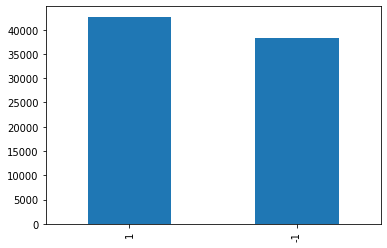

In [ ]:
dataset_dota2_train['TeamWIN'].value_counts().plot(kind='bar')
dataset_dota2_train['TeamWIN'].value_counts()

Melihat deskripsi data

In [ ]:
#deskripsi data
dataset_dota2_train.describe()

,TeamWIN,Anti-Mage,Axe,Bane,Bloodseeker,Crystal Maiden,Drow Ranger,Earthshaker,Juggernaut,Mirana,...,Legion Commander,Techies,Ember Spirit,Earth Spirit,Abyssal Underlord,Terrorblade,Phoenix,Oracle,Winter Wyvern,Arc Warden
count,80977.000000,80977.000000,80977.000000,80977.000000,80977.000000,80977.000000,80977.000000,80977.000000,80977.000000,80977.000000,...,80977.000000,80977.000000,80977.000000,80977.000000,80977.0,80977.000000,80977.000000,80977.000000,80977.000000,80977.000000
mean,0.054052,-0.002038,-0.001741,0.000543,-0.000519,-0.002087,0.002766,-0.000531,-0.003507,0.006520,...,-0.001272,-0.001050,0.000815,0.000370,0.0,0.000383,0.000519,-0.000482,-0.000037,0.001000
std,0.998544,0.405070,0.475579,0.160115,0.350924,0.336418,0.492276,0.351714,0.509772,0.607072,...,0.548534,0.204394,0.281351,0.156764,0.0,0.208227,0.201444,0.168716,0.188426,0.135599
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#deskripsi data
dataset_dota2_test.describe()

,TeamWIN,Anti-Mage,Axe,Bane,Bloodseeker,Crystal Maiden,Drow Ranger,Earthshaker,Juggernaut,Mirana,...,Legion Commander,Techies,Ember Spirit,Earth Spirit,Abyssal Underlord,Terrorblade,Phoenix,Oracle,Winter Wyvern,Arc Warden
count,8959.00000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,...,8959.000000,8959.000000,8959.000000,8959.000000,8959.0,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000
mean,0.07512,-0.000446,0.002344,0.000223,0.000112,-0.009153,0.002902,0.003125,-0.008260,0.004800,...,0.003125,0.002344,-0.000446,0.000223,0.0,0.000223,0.001898,-0.001451,-0.001228,0.000558
std,0.99723,0.400100,0.474742,0.164362,0.345448,0.339623,0.489671,0.357660,0.514078,0.604441,...,0.544094,0.206219,0.284683,0.145637,0.0,0.204875,0.204593,0.168713,0.181466,0.132386
min,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dataset_dota2_train.loc[:, 'ClusterID':'GameMode'].describe(include=['O'])

,ClusterID,GameMode
count,80977,80977
unique,14,8
top,Southeast Asia,Tournament
freq,36079,70797


In [ ]:
dataset_dota2_train.pivot_table('TeamWIN',
                     index='ClusterID',
                     columns=['GameMode', 'GameType'],
                     aggfunc='count',
                     fill_value=0)

GameMode       Co-op with bots      Practice        Ranked Solo Mid 1vs1  \
GameType         Captains Mode Captains Mode Captains Mode Captains Mode   
ClusterID                                                                  
Australia                    1            26             1             6   
Chile                        0             1             0             4   
China                      133           490            40          3058   
Europe East                  5            22             4             8   
Europe West                 12            53             5            50   
India                        0             1             0             1   
Peru                         0             0             1             4   
Russia                      20           122            12            53   
South Africa                 0             1             0            10   
South America                2            24             1             2   
South Korea                  0            16             0            19   
Southeast Asia               7           359             8            33   
US East                      3            31             3            48   
US West                      2            44             4            53   

GameMode                    Solo Queue                             \
GameType       Random Draft   All Pick Captains Mode Random Draft   
ClusterID                                                           
Australia                 2          0             6            0   
Chile                     0          0             2            0   
China                  4124          2           119           26   
Europe East              32          0             3            5   
Europe West             106          7            14           39   
India                     0          0             1            0   
Peru                      0          0             2            0   
Russia                  155          0            24           39   
South Africa              0          0             1            0   
South America             0          0             2            3   
South Korea               1          0            13            0   
Southeast Asia           76          5            46           71   
US East                   6          0            17           12   
US West                   2          0            19            1   

GameMode          Team match    Tournament                   Tutorial  
GameType       Captains Mode Captains Mode Random Draft Captains Mode  
ClusterID                                                              
Australia                  0           569          420            11  
Chile                      0           101            6             0  
China                      2          9349         5572            43  
Europe East                0           616          707            19  
Europe West                0          1918         2290            57  
India                      0           148           52             7  
Peru                       0            81           35             2  
Russia                     7          3714         2635           144  
South Africa               0            87            1             5  
South America              0           637          604             7  
South Korea                0          1255          858            11  
Southeast Asia             3         20211        15228            32  
US East                    0          1051         1263            23  
US West                    0           772          617            21

Melihat Info data

In [ ]:
dataset_dota2_test.dtypes

TeamWIN           int64
ClusterID        object
GameMode         object
GameType         object
Anti-Mage         int64
                  ...  
Terrorblade       int64
Phoenix           int64
Oracle            int64
Winter Wyvern     int64
Arc Warden        int64
Length: 116, dtype: object

In [ ]:
dataset_dota2_train.dtypes

TeamWIN           int64
ClusterID        object
GameMode         object
GameType         object
Anti-Mage         int64
                  ...  
Terrorblade       int64
Phoenix           int64
Oracle            int64
Winter Wyvern     int64
Arc Warden        int64
Length: 116, dtype: object

In [ ]:
#melihat info data
dataset_dota2_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80977 entries, 0 to 92649
Columns: 116 entries, TeamWIN to Arc Warden
dtypes: int64(113), object(3)
memory usage: 72.3+ MB


In [ ]:
#melihat info data
dataset_dota2_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8959 entries, 0 to 10293
Columns: 116 entries, TeamWIN to Arc Warden
dtypes: int64(113), object(3)
memory usage: 8.0+ MB


## **2.3. PLOTTING DATA**

Melakukan Plotting Untuk Melihat Bentuk data, jumlah data, dan sebaran data

### **2.3.2. PLOTTING JUMLAH DATA**

In [ ]:
# #plotting jumlah data
# dataset_dota2_train.hist(alpha=0.5, figsize=(15, 15), color='red')
# plt.show()

In [ ]:
# #plotting jumlah data
# dataset_dota2_test.hist(alpha=0.5, figsize=(15, 15), color='red')
# plt.show()

### **2.3.3. MELIHAT SEBARAN DATASET**

In [ ]:
# #MELIHAT SEBARAN DATASET
# sns.pairplot(data=dataset_dota2_train,diag_kind='hist')
# plt.show()

In [ ]:
# #MELIHAT SEBARAN DATASET
# sns.pairplot(data=dataset_dota2_test,diag_kind='hist')
# plt.show()

## **2.4. PREPROCESSING**

### **2.4.1. CHECK DUPLICATED**

Untuk mengecheck duplikasi data dan menghapusnya

In [ ]:
# Check for duplicate rows.
print(f"There are {dataset_dota2_train.duplicated().sum()} duplicate rows in the dataset_dota2_train set.")

# Remove duplicate rows.
dataset_dota2_train=dataset_dota2_train.drop_duplicates()
print("The duplicate rows were removed.")

There are 0 duplicate rows in the dataset_dota2_train set.
The duplicate rows were removed.


In [ ]:
# Check for duplicate rows.
print(f"There are {dataset_dota2_test.duplicated().sum()} duplicate rows in the dataset_dota2_test set.")

# Remove duplicate rows.
dataset_dota2_test=dataset_dota2_test.drop_duplicates()
print("The duplicate rows were removed.")

There are 0 duplicate rows in the dataset_dota2_test set.
The duplicate rows were removed.


Mengurutkan kembali kolom, sehingga y atau target berada di paling belakang

In [ ]:
# # rearrange the columns in the dataset to contain the TeamWIN (target/label) at the end
# cols = list(dataset_dota2_train.columns.values)
# cols.pop(cols.index('TeamWIN')) # pop TeamWIN out of the list
# dataset_dota2_train = dataset_dota2_train[cols+['TeamWIN']] #Create new dataframe with columns in new
# display(dataset_dota2_train)

In [ ]:
# # rearrange the columns in the dataset to contain the TeamWIN (target/label) at the end
# cols = list(dataset_dota2_test.columns.values)
# cols.pop(cols.index('TeamWIN')) # pop TeamWIN out of the list
# dataset_dota2_test = dataset_dota2_test[cols+['TeamWIN']] #Create new dataframe with columns in new
# display(dataset_dota2_test)

In [ ]:
dataset_dota2_train

,TeamWIN,ClusterID,GameMode,GameType,Anti-Mage,Axe,Bane,Bloodseeker,Crystal Maiden,Drow Ranger,...,Legion Commander,Techies,Ember Spirit,Earth Spirit,Abyssal Underlord,Terrorblade,Phoenix,Oracle,Winter Wyvern,Arc Warden
0,-1,China,Tournament,Captains Mode,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Southeast Asia,Tournament,Captains Mode,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,Europe West,Tournament,Captains Mode,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,Southeast Asia,Tournament,Captains Mode,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
4,-1,Australia,Tournament,Random Draft,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92645,-1,Southeast Asia,Tournament,Random Draft,1,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
92646,1,Southeast Asia,Tournament,Captains Mode,0,0,0,0,-1,0,...,1,0,0,0,0,0,0,0,0,0
92647,1,US West,Tournament,Random Draft,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92648,-1,Russia,Tournament,Captains Mode,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset_dota2_test

,TeamWIN,ClusterID,GameMode,GameType,Anti-Mage,Axe,Bane,Bloodseeker,Crystal Maiden,Drow Ranger,...,Legion Commander,Techies,Ember Spirit,Earth Spirit,Abyssal Underlord,Terrorblade,Phoenix,Oracle,Winter Wyvern,Arc Warden
0,-1,China,Solo Mid 1vs1,Captains Mode,0,-1,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
1,1,China,Solo Mid 1vs1,Captains Mode,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
2,-1,Europe West,Tournament,Captains Mode,1,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,China,Tournament,Captains Mode,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Russia,Tournament,Random Draft,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10287,-1,Southeast Asia,Tournament,Captains Mode,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
10288,-1,Southeast Asia,Tournament,Random Draft,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10289,1,US East,Tournament,Captains Mode,0,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
10292,1,Southeast Asia,Tournament,Random Draft,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
col=['TeamWIN','ClusterID','GameMode','GameType']
for i in col:
    print(dataset_dota2_train[i].value_counts())
    print(dataset_dota2_test[i].value_counts())

 1    42677
-1    38300
Name: TeamWIN, dtype: int64
 1    4816
-1    4143
Name: TeamWIN, dtype: int64
Southeast Asia    36079
China             22958
Russia             6925
Europe West        4551
US East            2457
South Korea        2173
US West            1535
Europe East        1421
South America      1282
Australia          1042
India               210
Peru                125
Chile               114
South Africa        105
Name: ClusterID, dtype: int64
Southeast Asia    3925
China             2567
Russia             785
Europe West        531
US East            268
South Korea        243
Europe East        163
South America      161
US West            160
Australia           95
India               27
Chile               13
Peru                12
South Africa         9
Name: ClusterID, dtype: int64
Tournament         70797
Solo Mid 1vs1       7853
Practice            1190
Solo Queue           479
Tutorial             382
Co-op with bots      185
Ranked                79
Team 

# **3. IMPLEMENTASI MLP**

## **3.1. PEMBAGIAN DATA**

In [ ]:
def prepare_train_test_data(train_df: pd.DataFrame,
                            test_df: pd.DataFrame,
                            target: str,
                            features: list,
                            encoding_method: Literal['one_hot_encoding', 'label_encoding'] = 'label_encoding',
                            encode_target=False):
        """
        Prepearing training and testing data by splitting dataframes to the train and test one.
        Also performing features and target encoding by either One Hot Encoding or Lable Encoding.
        """

        X_train = train_df.drop(target, axis=1)
        X_test = test_df.drop(target, axis=1)

        y_train = train_df[[target]]
        y_test = test_df[[target]]

        if encode_target:
            y_train, y_test, y_encoders = labels_encoding(y_train, y_test, [target])

        y_train = np.array(y_train).ravel()
        y_test = np.array(y_test).ravel()

        if encoding_method == 'label_encoding':
            X_train, X_test, X_encoders = labels_encoding(X_train, X_test, features)
            return X_train, X_test, y_train, y_test

        elif encoding_method == 'one_hot_encoding':
            X_train, X_test = one_hot_encoding(X_train, X_test, features)
            return X_train, X_test, y_train, y_test

        else:
            return X_train, X_test, y_train, y_test

def labels_encoding(train_data, test_data, features):
    """
    Performs labels encoding for the given training and testing data
    """

    label_encoders = {}

    for feature in features:
        label_encoders['train_' + feature] = preprocessing.LabelEncoder()
        label_encoders['test_' + feature] = preprocessing.LabelEncoder()

        label_encoders['train_' + feature].fit(train_data[[feature]])
        label_encoders['test_' + feature].fit(test_data[[feature]])

        train_data[feature] = label_encoders['train_' + feature].transform(train_data[[feature]])
        test_data[feature] = label_encoders['test_' + feature].transform(test_data[[feature]])

    return train_data, test_data, label_encoders


def one_hot_encoding(train_data, test_data, features):
    """
    Performs one hot encoding for the given training and testing data
    """

    train_data_ohe_features = pd.get_dummies(train_data[[*features]])
    test_data_features = pd.get_dummies(test_data[[*features]])

    train_data.drop([*features], axis=1, inplace=True)
    test_data.drop([*features], axis=1, inplace=True)

    train_data = pd.concat((train_data, train_data_ohe_features), 1)
    test_data = pd.concat((test_data, test_data_features), 1)

    return train_data, test_data

def show_model_accuracy(X_train, X_test, y_train, y_test):
    y_pred = mlp.predict(X_test)
    print('====================== Accuracy =======================')
    print(f'Training data:\t{mlp.score(X_train, y_train) * 100:.2f} %')
    print(f'Testing data:\t{mlp.score(X_test, y_test) * 100 :.2f} %')
    print(f'Precision:\t{metrics.precision_score(y_test, y_pred)}')
    print(f'F1 score:\t{metrics.f1_score(y_test, y_pred)}')
    print(f'Recall:\t\t{metrics.recall_score(y_test, y_pred)}')
    print('=======================================================')

membagi dat untuk dibuat ke dalam X_train, X_test, y_train, y_test

## **3.2. MEMBUAT MODEL dan TRAINING MODEL**

proses pembuatan model mlp yang telah di uji untuk mendapatkan akurasi terbaik

In [ ]:
## The Winning Team Prediction (Multi Layer Perceptron)
from sklearn import metrics
#### Prepearing data with one hot encoding

X_train, X_test, y_train, y_test = prepare_train_test_data(
    dataset_dota2_train,
    dataset_dota2_test,
    target='TeamWIN',
    features=['GameType', 'ClusterID', 'GameMode'],
    encoding_method='one_hot_encoding',
    encode_target=True
)

print('Data shape')
print(f"X_train: {X_train.shape} X_test: {y_train.shape}")
print(f"t_train: {X_test.shape} y_test: {y_test.shape}")

Data shape
X_train: (80977, 137) X_test: (80977,)
t_train: (8959, 137) y_test: (8959,)


In [ ]:
#### Training the model
mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(100,200,100), learning_rate='constant', learning_rate_init=0.01, max_iter=100, solver='adam')
mlp.fit(X_train, y_train)


show_model_accuracy(X_train, X_test, y_train, y_test)

====================== Accuracy =======================
Training data:	87.68 %
Testing data:	54.63 %
Precision:	0.5886658795749705
F1 score:	0.5508783559827644
Recall:		0.5176495016611296


# **4. PLOTTING HASIL AKURASI DAN PREDIKSI**

Accuracy
0.5492800535774082


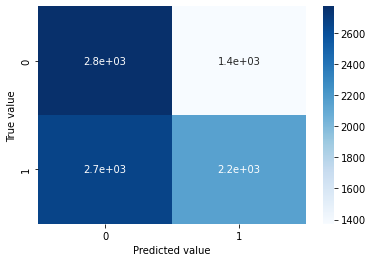

In [ ]:

print('Accuracy')
print(mlp.score(X_test, y_test))

# draw the confusion matrix
predict = mlp.predict(X_test)

confusion_matrix = confusion_matrix(y_test, predict)
fig, ax = plt.subplots(1)
ax = sns.heatmap(confusion_matrix, ax=ax, cmap=plt.cm.Blues, annot=True)
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()